In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from src.visualisation import compare
from src.visualisation import plot_statistics, print_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [12]:
losses = {}
epochs = {}
times = {}

ISNR = 30
nets = [
#     "unet_30dB_sigmoid_long", "dunet_30dB_sigmoid_learned_grad_long", 
    "unet_30dB_sigmoid_same", "dunet_30dB_sigmoid_same",
    "unet_30dB_sigmoid_small", "dunet_30dB_sigmoid_small2",
    "unet_30dB_sigmoid_smaller", "dunet_30dB_sigmoid_smaller",
    
]

for net in nets:
    key = net #.split("_")[0]
    path = f"./logs/COCO/log_{net}"
    loss = pd.read_csv(path)
    epochs[key] = loss.epoch.values
    losses[key] = loss.loss.values
    times[key] = loss.time.values

Text(0.5, 0, 'iterations')

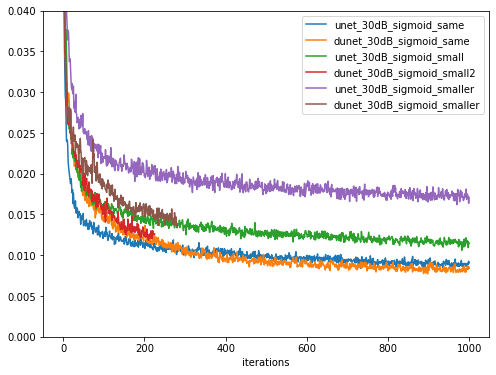

In [14]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
#     print(i, np.sum(epochs[i] ==0))
    plt.plot( losses[i], label = i)
plt.legend()
plt.axis(ymax=.04, ymin=0)
plt.xlabel('iterations')

In [5]:
losses[i].min()

NameError: name 'i' is not defined

In [29]:
i

'unet_30dB_sigmoid_same'

In [31]:
f = 2

Text(0, 0.5, 'loss')

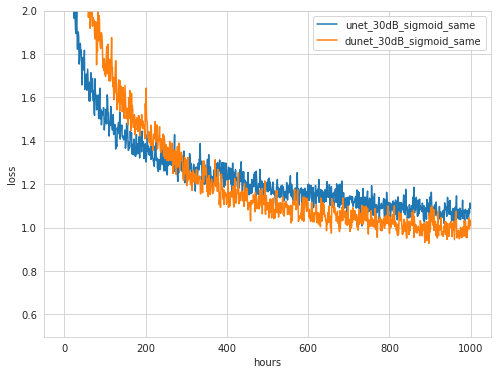

In [32]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    plt.plot( losses[i]/losses['unet_30dB_sigmoid_same'].min(), label = i)
# plt.axhline(0.020, ls="dashed", alpha=.5, label="PD")
plt.legend()
plt.axis(ymax=f)
plt.xlabel('hours')
plt.ylabel('loss')
# plt.yscale('log')

In [9]:
losses[i].min(), losses[i].min()*f

(0.0077156245242804, 0.0154312490485608)

In [10]:
true = np.load(f"./data/intermediate/x_true_gen_30dB.npy")

res_unet = np.load(f"./data/processed/COCO/test_predict_unet_gen_sigmoid_same.npy")
res_dunet = np.load(f"./data/processed/COCO/test_predict_dunet_gen_sigmoid_same.npy")
# res_dunet= res_unet

In [12]:


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]

In [13]:
statistics = pd.DataFrame(columns=["PSNR", "SSIM", "MSE", "method", "Set"])

x = true


for name, pred in [('unet', res_unet), ('dunet', res_dunet)]:
    for idx, sets in [(0, "COCO"), (1000, "GZOO"), (2000, "LLPS"), (3000, "SATS")]:
        df = pd.DataFrame()

        for metric, f in metrics:

            df[metric] = [f(x[i], pred[i].astype(np.float64)) for i in range(idx, idx+1000)]
        df['Method'] = name
        df['Set'] = sets
        if statistics.empty:
            statistics = df
        else:
            statistics = statistics.append(df, ignore_index=False)


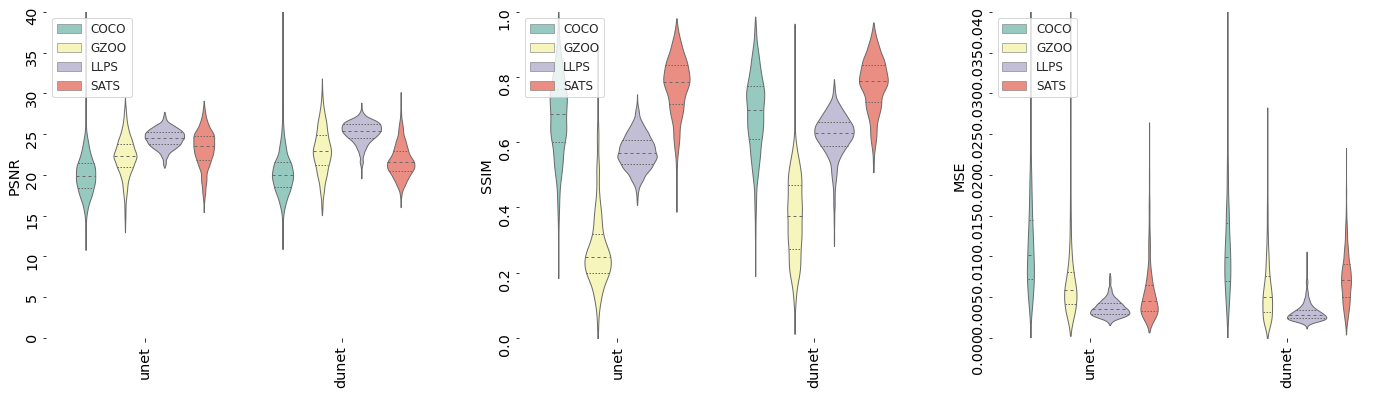

In [16]:
plot_statistics(statistics, metrics, split=False)

In [17]:
results = []
# results += [('unet', sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")]]
# results += [('dunet', sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")]]

results += [(net, sets, '') for idx, sets in [(0, "COCO"), (100, "GZOO"), (200, "LLPS"), (300, "SATS")] for net in ['unet', 'dunet']]



In [22]:
for data in ['COCO', "GZOO", "LLPS", "SATS"]:
    ress = [('unet', data, ''), ('dunet', data, '')]
    print_statistics(statistics[statistics.Set == data], ress, metrics);

|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet_COCO                              |  20.257 \pm   2.888|   0.689 \pm   0.121|   0.011 \pm   0.007|
|unet_COCO                               |  20.054 \pm   2.753|   0.678 \pm   0.123|   0.012 \pm   0.007|
|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet_GZOO                              |  23.028 \pm   2.804|   0.369 \pm   0.125|   0.006 \pm   0.004|
|unet_GZOO                               |  22.281 \pm   2.463|   0.273 \pm   0.124|   0.007 \pm   0.005|
|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet_LLPS                              |  25.256 \pm   1.304|   0.622 \pm   0.066|   0.003 \pm   0.001|
|unet_LLPS                               |  24.507 \pm   1.133|   0.571 \pm   0.053|   0.004 \pm   0.001|
|Name                                    |PSNR

In [20]:
print_statistics(statistics, results, metrics)

|Name                                    |PSNR                |SSIM                |MSE                 |
|dunet_COCO                              |  20.257 \pm   2.888|   0.689 \pm   0.121|   0.011 \pm   0.007|
|dunet_GZOO                              |  23.028 \pm   2.804|   0.369 \pm   0.125|   0.006 \pm   0.004|
|dunet_LLPS                              |  25.256 \pm   1.304|   0.622 \pm   0.066|   0.003 \pm   0.001|
|dunet_SATS                              |  21.767 \pm   2.041|   0.778 \pm   0.082|   0.007 \pm   0.003|
|unet_COCO                               |  20.054 \pm   2.753|   0.678 \pm   0.123|   0.012 \pm   0.007|
|unet_GZOO                               |  22.281 \pm   2.463|   0.273 \pm   0.124|   0.007 \pm   0.005|
|unet_LLPS                               |  24.507 \pm   1.133|   0.571 \pm   0.053|   0.004 \pm   0.001|
|unet_SATS                               |  23.229 \pm   2.284|   0.775 \pm   0.089|   0.006 \pm   0.003|


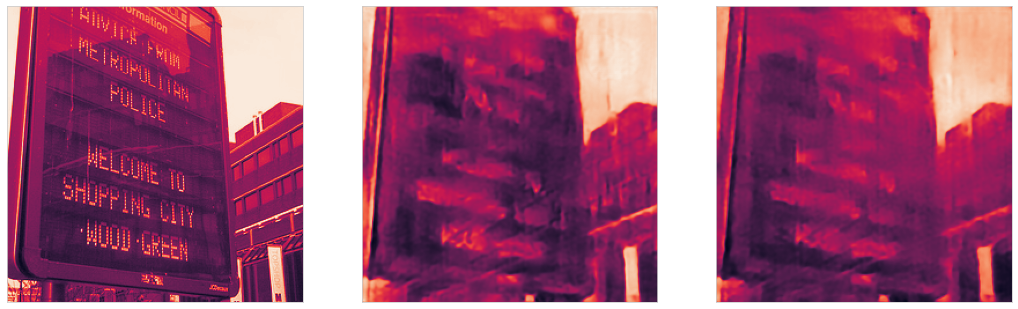

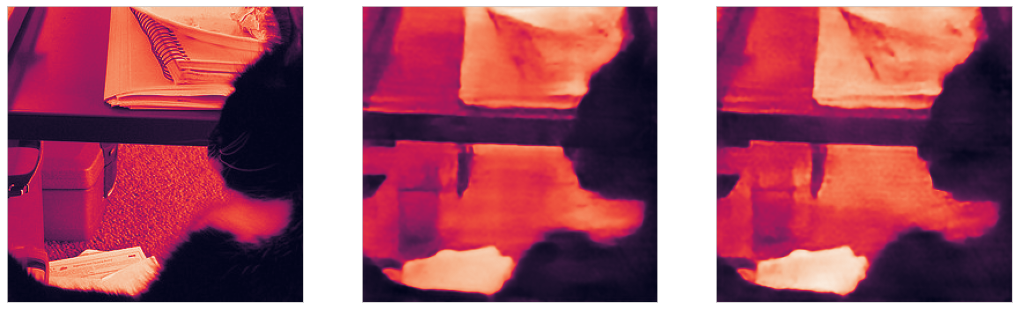

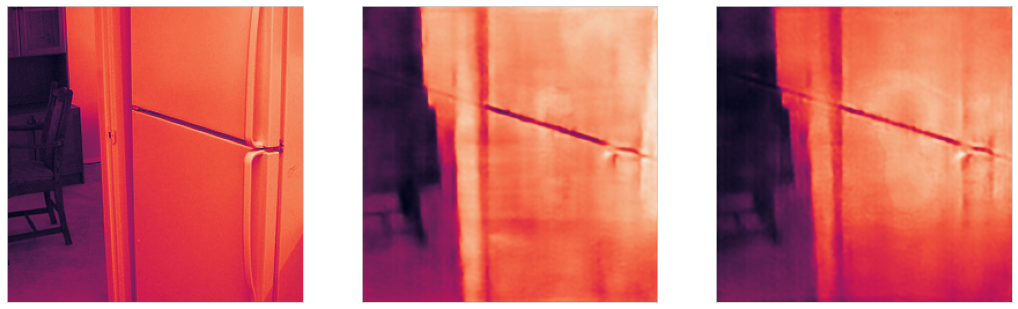

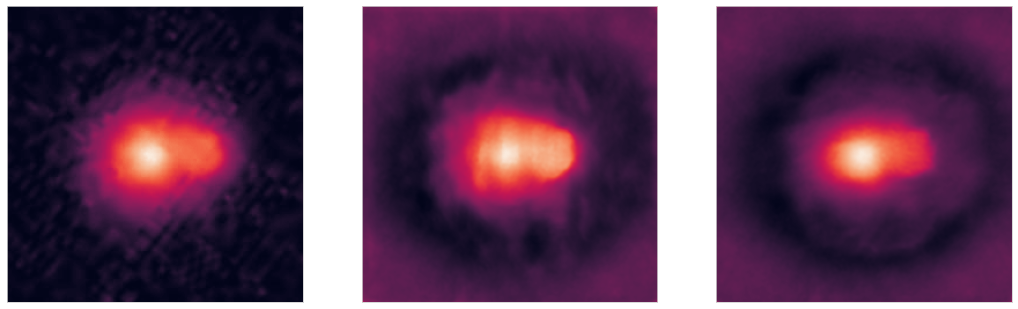

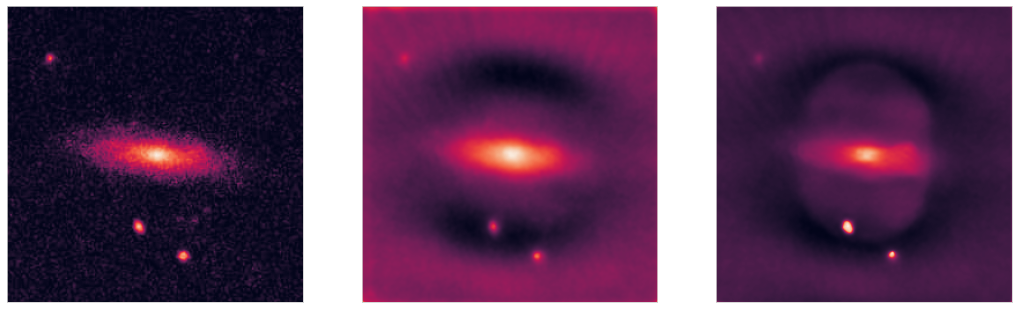

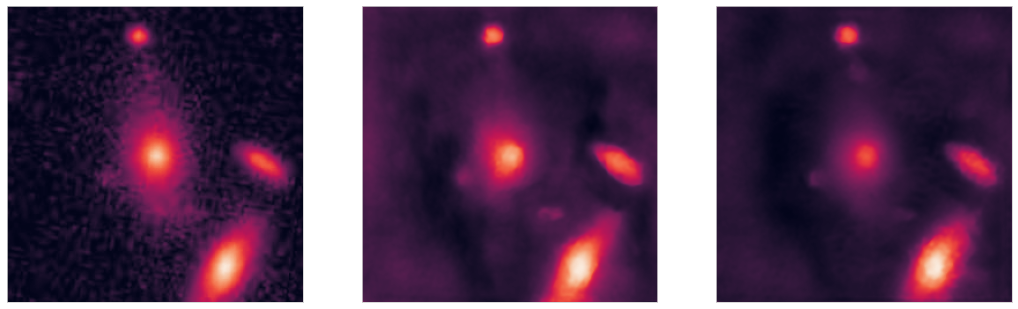

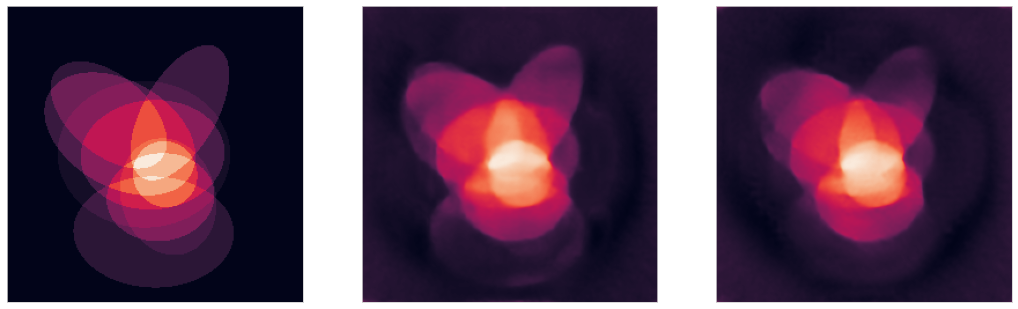

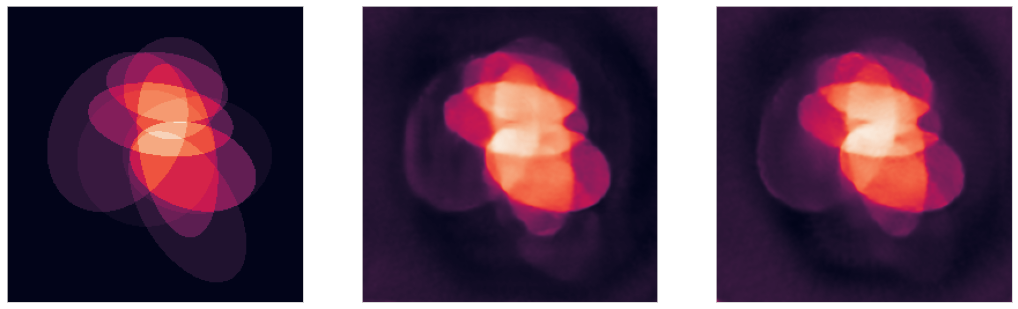

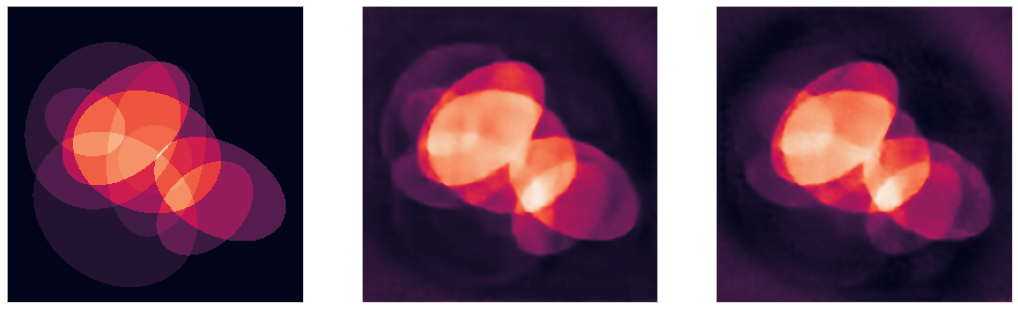

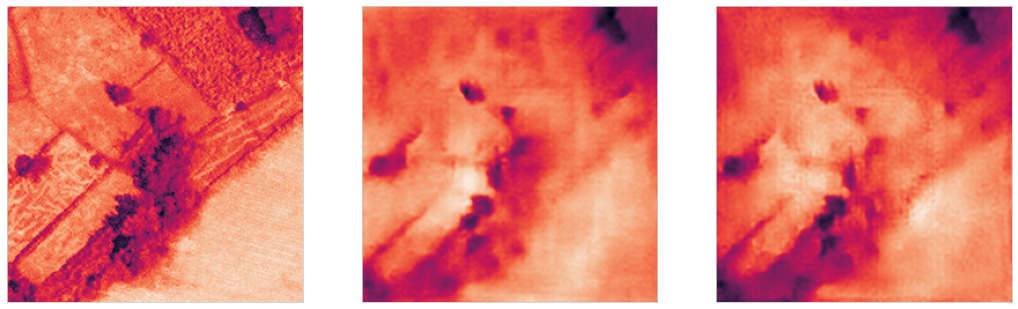

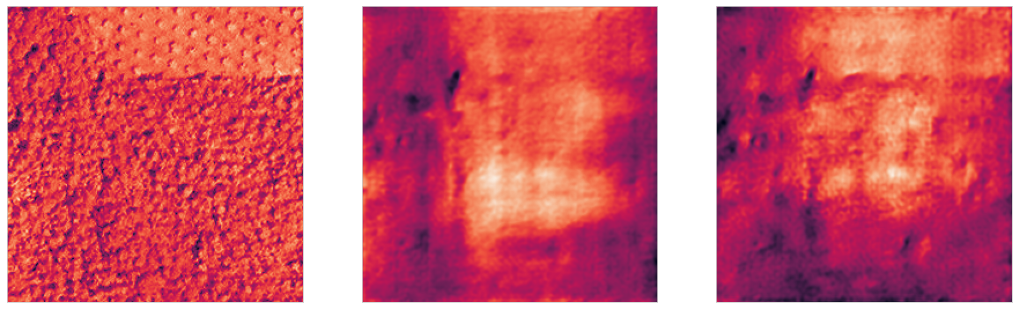

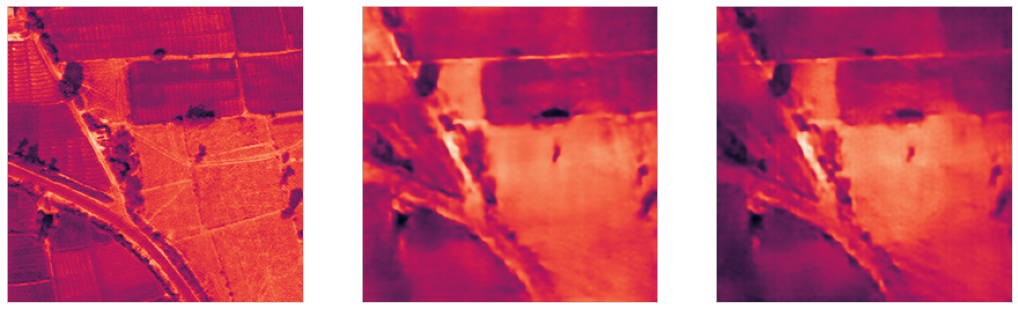

In [33]:
for i in [0,1000,2000,3000]:
    for j in range(3):
        compare([true[i], res_unet[i], res_dunet[i]], cmap='gray')
        i += 1